## BRANCH AND BOUND ALGORITMA

- Nama : Hafizh Hilman Asyhari
- NIM : 202331206
- Fakultas : Fakultas Telematika Energi
- Mata Kuliah : Analisis Algoritma
- Dosen : Bapak M Yoga Distra Sudirman, S.T., MTI
- Tahun : 2025
- Negara : Indonesia

In [1]:

# Traveling Salesman Problem (TSP) dengan Branch and Bound - Google Colab

# --- Import library yang dibutuhkan ---
import numpy as np
import matplotlib.pyplot as plt
import heapq
from math import sqrt

# --- Nilai variabel berdasarkan NIM 202331206 ---
a = 2
b = 0
c = 2
d = 3
e = 3

# --- Bangkitkan koordinat 5 kota berdasarkan variabel ---
coords = [(a,b), (b,c), (c,d), (d,e), (e,a)]

# --- Fungsi untuk menghitung Euclidean distance ---
def euclidean(p1, p2):
    return round(sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2), 2)

# --- Buat matriks jarak antar kota ---
n = len(coords)
dist_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i != j:
            dist_matrix[i][j] = euclidean(coords[i], coords[j])
print("Matriks Jarak:")
print(dist_matrix)


Matriks Jarak:
[[0.   2.83 3.   3.16 2.24]
 [2.83 0.   2.24 3.16 3.  ]
 [3.   2.24 0.   1.   1.41]
 [3.16 3.16 1.   0.   1.  ]
 [2.24 3.   1.41 1.   0.  ]]


In [2]:

class Node:
    def __init__(self, path, cost, level, bound):
        self.path = path
        self.cost = cost
        self.level = level
        self.bound = bound

    def __lt__(self, other):
        return self.bound < other.bound

def bound(node, dist_matrix):
    cost = node.cost
    n = len(dist_matrix)
    visited = set(node.path)
    for i in range(n):
        if i not in visited:
            min_edge = min([dist_matrix[i][j] for j in range(n) if i != j and j not in visited], default=0)
            cost += min_edge
    return cost

def tsp_branch_and_bound(dist_matrix):
    n = len(dist_matrix)
    root = Node(path=[0], cost=0, level=0, bound=0)
    root.bound = bound(root, dist_matrix)
    
    pq = []
    heapq.heappush(pq, root)
    min_cost = float('inf')
    best_path = []

    while pq:
        curr = heapq.heappop(pq)
        if curr.bound >= min_cost:
            continue
        if curr.level == n - 1:
            last_to_first = dist_matrix[curr.path[-1]][0]
            total_cost = curr.cost + last_to_first
            if total_cost < min_cost:
                min_cost = total_cost
                best_path = curr.path + [0]
        else:
            for i in range(n):
                if i not in curr.path:
                    new_path = curr.path + [i]
                    new_cost = curr.cost + dist_matrix[curr.path[-1]][i]
                    child = Node(new_path, new_cost, curr.level + 1, 0)
                    child.bound = bound(child, dist_matrix)
                    if child.bound < min_cost:
                        heapq.heappush(pq, child)

    return best_path, min_cost

# Jalankan algoritma
path_bb, cost_bb = tsp_branch_and_bound(dist_matrix)
print("Hasil Branch and Bound:")
print("Path:", path_bb)
print("Cost:", cost_bb)


Hasil Branch and Bound:
Path: [0, 1, 2, 3, 4, 0]
Cost: 9.31


In [3]:

def tsp_greedy(dist_matrix):
    n = len(dist_matrix)
    visited = [False] * n
    path = [0]
    total_cost = 0
    visited[0] = True

    for _ in range(n-1):
        last = path[-1]
        next_city = min((dist_matrix[last][j], j) for j in range(n) if not visited[j])[1]
        path.append(next_city)
        total_cost += dist_matrix[last][next_city]
        visited[next_city] = True

    total_cost += dist_matrix[path[-1]][0]
    path.append(0)
    return path, total_cost

path_greedy, cost_greedy = tsp_greedy(dist_matrix)
print("Hasil Greedy:")
print("Path:", path_greedy)
print("Cost:", cost_greedy)


Hasil Greedy:
Path: [0, 4, 3, 2, 1, 0]
Cost: 9.31


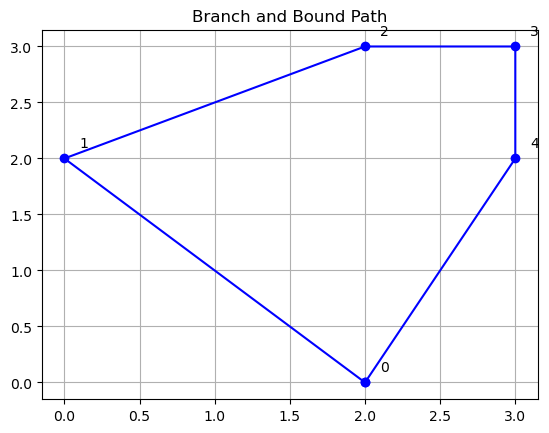

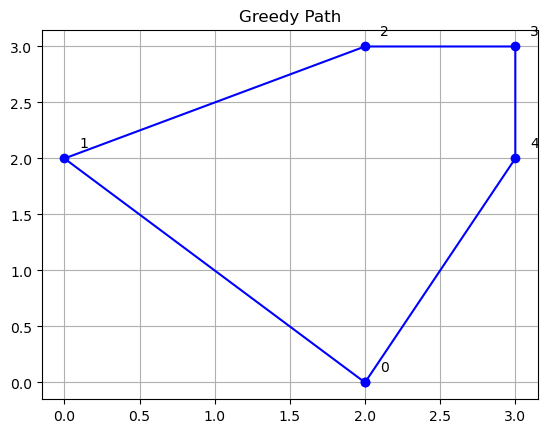

In [4]:

# Visualisasi rute TSP
def plot_path(coords, path, title):
    x = [coords[i][0] for i in path]
    y = [coords[i][1] for i in path]
    plt.figure()
    plt.plot(x, y, 'bo-')
    for i, (x_, y_) in enumerate(coords):
        plt.text(x_ + 0.1, y_ + 0.1, f"{i}")
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_path(coords, path_bb, "Branch and Bound Path")
plot_path(coords, path_greedy, "Greedy Path")


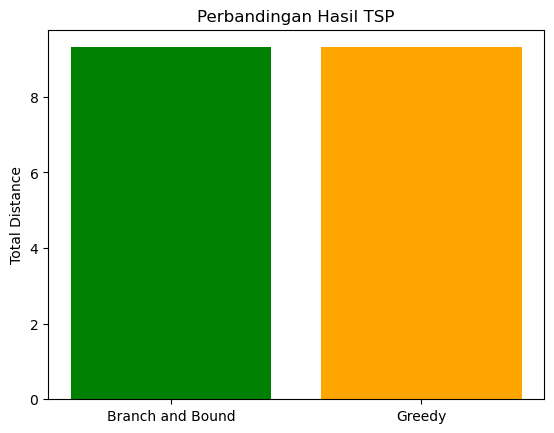

In [5]:

# Perbandingan biaya dengan grafik
labels = ['Branch and Bound', 'Greedy']
costs = [cost_bb, cost_greedy]
plt.bar(labels, costs, color=['green', 'orange'])
plt.ylabel('Total Distance')
plt.title('Perbandingan Hasil TSP')
plt.show()
